<a href="https://colab.research.google.com/github/MAbubakarArshad/Credit_Card_Fraud_Detection/blob/main/iris_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
from sklearn import datasets # to load the Iris dataset
from sklearn.model_selection import train_test_split # for splitting the data into train and test sets
from sklearn.metrics import confusion_matrix, classification_report # for evaluating the models
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier
from sklearn.svm import SVC # for SVM classifier
from sklearn.ensemble import RandomForestClassifier # for Random Forest classifier
from sklearn.preprocessing import StandardScaler # for scaling the data


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Print the information of the Iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Print the summary statistics of the data
print(pd.DataFrame(X).describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [5]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

In [6]:
# Add the target column to the DataFrame
df['target'] = y

In [7]:
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [8]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Initialize the three classifiers
knn = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()

In [11]:
# Fit the classifiers on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
svm.fit(X_train, y_train)


SVC()

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [15]:
y_pred_knn

array([2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 0, 1, 0, 0, 1, 2, 2])

In [16]:
y_pred_svm

array([2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 0, 2, 0, 0, 1, 2, 2])

In [17]:
y_pred_rf

array([2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 0, 2, 0, 0, 1, 2, 2])

In [18]:
# Print the precision, recall, and f1-score for each classifier
print("KNN:")
print(classification_report(y_test, y_pred_knn))



KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92        12
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [19]:
print("SVM:")
print(classification_report(y_test, y_pred_svm))


SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [20]:
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [21]:
# Print the confusion matrix for each classifier
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



KNN Confusion Matrix:
[[ 7  0  0]
 [ 0 12  0]
 [ 0  2  9]]


In [22]:
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



SVM Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [23]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


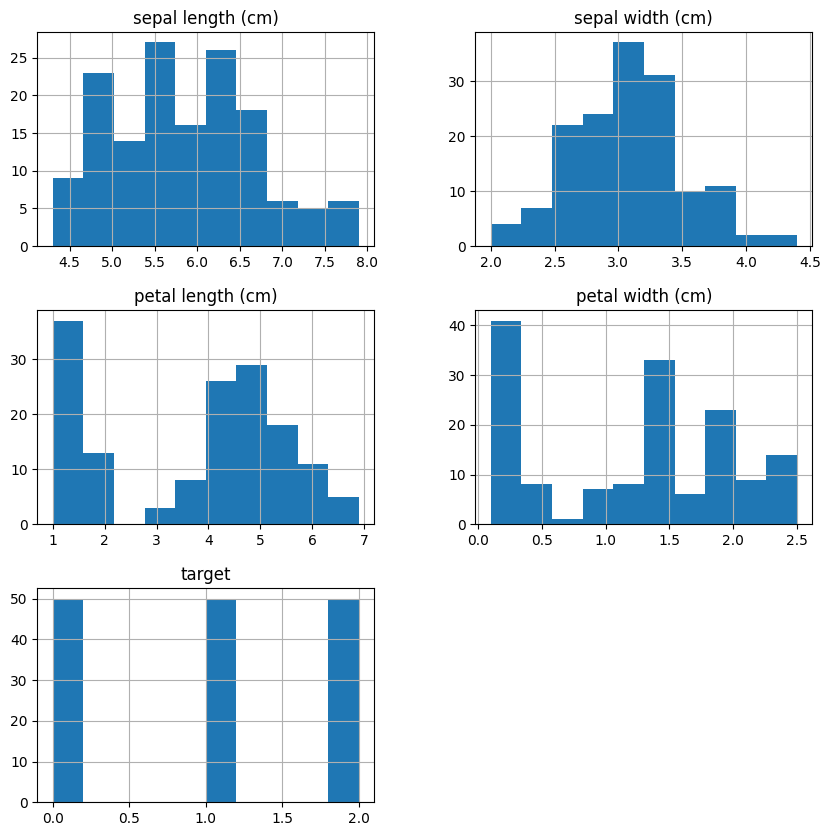

In [24]:
# Plot the distribution of each feature using a histogram
df.hist(figsize=(10,10))
plt.show()

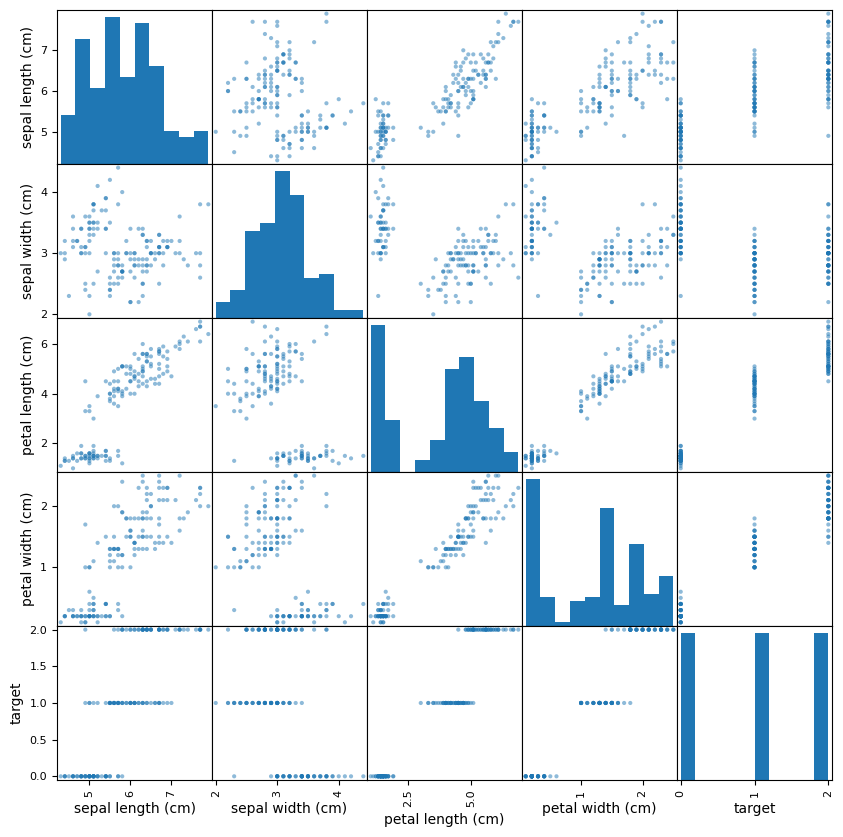

In [25]:
# Plot the pairwise relationships between features using a scatter matrix
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()
